In [1]:
import numpy as np
import operator
import random
import pickle
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn as sk

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error
#快速1次轉2次
from sklearn import preprocessing 
from sklearn.preprocessing import PolynomialFeatures

from sklearn.gaussian_process import GaussianProcessRegressor as gpr
from sklearn.gaussian_process.kernels import RationalQuadratic,ConstantKernel



((150, 4), (150,))

In [3]:
#建立 複回歸模型

#load training data
raw_data = pd.read_excel('data/all_raw_data.xlsx')

raw_data_Y = raw_data[["y_value_TI_3","y_value_TI_15","y_value_vel_3","y_value_vel_15"]]

Y_list = ["y_value_TI_3","y_value_TI_15","y_value_vel_3","y_value_vel_15"]

X = np.load('data/X_data.npy')
#81 case
#(81, 4)

#deg 代表我要將我的模型設幾次方
#利用dic 存取模型
def train_model(inX,deg = 2):
    poly = PolynomialFeatures(deg,include_bias = False)
    TrainX = poly.fit_transform(inX)
    pre_fun = {}
    mape_list = {}
    R_list = {}
    for index,y in enumerate (Y_list):
        raw_Y = raw_data_Y[y]
        for i in range(10):
            model = linear_model.LinearRegression()
            a = range(i,810,10)
            Train_Y = raw_Y[list(a)]
            pre_fun[y[8:]+"_"+str(i)] = model.fit(TrainX,Train_Y)
            mape_list[y[8:]+"_"+str(i)] = mean_absolute_error(Train_Y,model.predict(TrainX))
            
    return pre_fun,mape_list

Multiple_Regression_Model ,MAE = train_model(X)

In [9]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split

C:\Users\409_KAI\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
poly = PolynomialFeatures(2,include_bias = False)
TrainX = poly.fit_transform(X)


In [12]:
TrainX[0]


array([0.1 , 0.1 , 0.1 , 0.1 , 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01])

In [13]:
reg = linear_model.LinearRegression()

In [15]:
a = range(0,810,10)

In [18]:
raw_data_Y['y_value_TI_3'][list(a)]

0      0.085802
10     0.085292
20     0.084833
30     0.108160
40     0.101025
50     0.097427
60     0.251953
70     0.228103
80     0.199546
90     0.094017
100    0.079950
110    0.077037
120    0.190487
130    0.085117
140    0.079306
150    0.049350
160    0.100635
170    0.082900
180    0.177876
190    0.077055
200    0.073604
210    0.104173
220    0.080786
230    0.074974
240    0.019340
250    0.089219
260    0.076863
270    0.115490
280    0.115443
290    0.115396
         ...   
510    0.033345
520    0.112767
530    0.109158
540    0.143150
550    0.143057
560    0.142967
570    0.148868
580    0.148725
590    0.148591
600    0.462270
610    0.399717
620    0.332919
630    0.140667
640    0.140157
650    0.138321
660    0.144728
670    0.142745
680    0.141596
690    0.097958
700    0.157679
710    0.146072
720    0.136904
730    0.136256
740    0.134694
750    0.140562
760    0.137797
770    0.136597
780    0.043677
790    0.142434
800    0.138519
Name: y_value_TI_3, Leng

In [46]:
scores = cross_val_score(reg,TrainX,raw_data_Y['y_value_TI_3'][list(a)],cv=81,scoring="mean_squared_error")

C:\Users\409_KAI\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\409_KAI\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\409_KAI\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\409_KAI\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\409_KAI\Anacond

In [61]:
k_range = range(2,81)
k_scores = []
for k_number in k_range:
    reg = linear_model.LinearRegression()
    scores = -(cross_val_score(reg,TrainX,raw_data_Y['y_value_TI_3'][list(a)],cv=k_number,scoring="r2"))
    k_scores.append(scores.mean())

In [68]:
k_range = range(2,81)
k_scores = []
for k_number in k_range:
    reg = linear_model.LinearRegression()
    scores = -(cross_val_score(reg,X,raw_data_Y['y_value_TI_3'][list(a)],cv=k_number,scoring="r2"))
    k_scores.append(scores.mean())

In [73]:
reg = linear_model.LinearRegression()

In [75]:
reg.fit(X=X,y= raw_data_Y['y_value_TI_3'][list(a)])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [86]:
reg.predict([[0,0,0,0]])

array([0.11227555])

In [81]:
print(reg.score(X=X,y= raw_data_Y['y_value_TI_3'][list(a)]))

0.37542300819409524


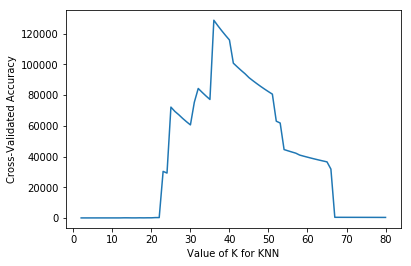

In [69]:
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

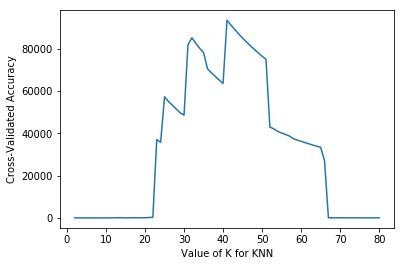

In [62]:
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

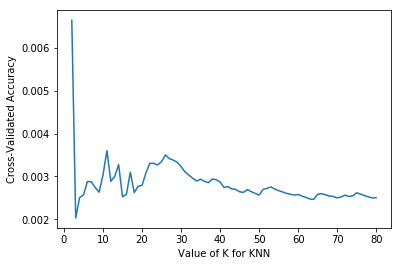

In [58]:
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [60]:
min(k_scores)

0.0020324113857452222

In [47]:
scores

array([-4.47863287e-04, -7.29562432e-05, -2.80623880e-03, -2.75310786e-03,
       -1.33831249e-03, -9.95205462e-05, -1.09094099e-04, -1.55803646e-05,
       -1.71024631e-04, -2.43796711e-05, -2.91114864e-06, -5.72808806e-04,
       -1.65369569e-02, -1.86858578e-04, -6.70037647e-04, -6.46148493e-03,
       -1.76979527e-04, -5.00116045e-04, -2.49185932e-03, -6.37604148e-03,
       -6.48653260e-03, -1.60456083e-03, -2.79427842e-05, -1.96882281e-05,
       -1.42749329e-03, -1.72833757e-03, -8.61191607e-04, -1.18031332e-04,
       -7.21691143e-05, -1.63234726e-03, -5.58432238e-03, -3.58838469e-03,
       -1.46570387e-03, -1.85905434e-02, -4.08681480e-03, -4.48530886e-05,
       -1.63828181e-04, -2.94540571e-04, -1.12955404e-03, -2.85825066e-04,
       -1.93105691e-04, -5.14394335e-04, -6.92773860e-03, -7.75108307e-04,
       -1.31451332e-03, -1.53790597e-03, -2.04818813e-03, -2.05023139e-03,
       -1.55484468e-03, -3.58919855e-04, -2.47385802e-04, -1.73480836e-03,
       -1.23054193e-03, -

In [8]:
raw_data_Y['y_value_TI_3']

0      0.085802
1      0.077405
2      0.071819
3      0.068473
4      0.066201
5      0.064567
6      0.063361
7      0.062461
8      0.061787
9      0.061281
10     0.085292
11     0.077023
12     0.071519
13     0.068221
14     0.065982
15     0.064375
16     0.063192
17     0.062312
18     0.061656
19     0.061165
20     0.084833
21     0.076680
22     0.071249
23     0.067993
24     0.065785
25     0.064203
26     0.063041
27     0.062179
28     0.061538
29     0.061061
         ...   
780    0.043677
781    0.030099
782    0.022817
783    0.018916
784    0.016435
785    0.014689
786    0.013378
787    0.012350
788    0.011526
789    0.010848
790    0.142434
791    0.132994
792    0.128666
793    0.127012
794    0.126301
795    0.125972
796    0.125808
797    0.125718
798    0.125662
799    0.125623
800    0.138519
801    0.134355
802    0.132731
803    0.132216
804    0.132035
805    0.131966
806    0.131935
807    0.131918
808    0.131906
809    0.131897
Name: y_value_TI_3, Leng

In [7]:
Y_list

['y_value_TI_3', 'y_value_TI_15', 'y_value_vel_3', 'y_value_vel_15']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=1/10, random_state=0)
#另外一個參數 random_state 設為 0 用來確保每次切分資料的結果都相同

In [19]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

In [20]:
clf.score(X_test, y_test)                           


1.0

In [97]:
#自己寫一個衡量指標
from  sklearn.metrics import make_scorer
def my_custom_score_func(ground_truth, predictions):
    print(ground_truth)
    diff = np.abs(ground_truth - predictions).max()
    return np.log(1 + diff)

# loss_func will negate the return value of my_custom_loss_func,
#  which will be np.log(2), 0.693, given the values for ground_truth
#  and predictions defined below.
loss  = make_scorer(my_custom_loss_func, greater_is_better=False)
score = make_scorer(my_custom_loss_func, greater_is_better=True)
ground_truth = [[1], [1]]
predictions  = [0, 1]
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf = clf.fit(ground_truth, predictions)

loss(clf,ground_truth, predictions) ,score(clf,ground_truth, predictions) 

(-0.6931471805599453, 0.6931471805599453)

In [126]:
def my_custom_score_func(ground_truth, predictions):
    return np.mean(np.abs((predictions- ground_truth)/ground_truth))

In [120]:
np.mean(np.abs((predictions- ground_truth)/ground_truth))

0.3273809523809524

In [124]:
(ground_truth - predictions)

array([ 0.5, -0.5,  0. , -1. ])

In [123]:
(ground_truth - predictions)/ground_truth

array([ 0.16666667,  1.        ,  0.        , -0.14285714])

In [103]:
from  sklearn.metrics  import mean_absolute_error

In [110]:
mean_absolute_error(y_true,y_pred)

0.5

In [111]:
mean_absolute_error(y_true,y_pred,multioutput='raw_values')

array([0.5])

In [101]:
y_true - y_pred

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [98]:
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
lasso = linear_model.Lasso()
print(cross_val_score(lasso, X, y,scoring=score))  

[5.05174786 4.90193368 5.19647053]


In [112]:
reg = linear_model.LinearRegression()

In [113]:
X = np.load('data/X_data.npy')

In [127]:
def my_custom_score_func(ground_truth, predictions):
    return np.mean(np.abs((predictions- ground_truth)/ground_truth))

#https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/metrics/scorer.py
loss  = make_scorer(my_custom_score_func, greater_is_better=False)
score = make_scorer(my_custom_score_func, greater_is_better=True)

In [114]:
reg.fit(X,y= raw_data_Y['y_value_TI_3'][list(a)])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [137]:
print(cross_val_score(reg, X,y= raw_data_Y['y_value_TI_3'][list(a)],scoring=score,cv=10)) 

[0.41127842 0.43542402 0.99125931 0.36360691 0.20980354 0.47504736
 0.52917278 0.27871202 0.34122276 0.49453677]


In [ ]:
reg = linear_model.LinearRegression()

In [156]:
reg = linear_model.LinearRegression(fit_intercept=True)
mape = cross_val_score(reg, TrainX,y= raw_data_Y['y_value_TI_3'][list(a)],scoring=score,cv=4)
mape.mean()

0.3568282508517402

0.4530063884488337

In [130]:
print(cross_val_score(reg, X,y= raw_data_Y['y_value_TI_3'][list(a)],scoring=loss,cv=9)) 

[-0.41127842 -0.47169692 -0.83182488 -0.38857399 -0.31864882 -0.55360506
 -0.31019339 -0.29144763 -0.47534135]


In [ ]:
loss()

In [115]:
reg.predict(X)

array([0.12279496, 0.11798728, 0.1131796 , 0.15078436, 0.14597669,
       0.14116901, 0.17877377, 0.1739661 , 0.16915842, 0.0820215 ,
       0.07721383, 0.07240615, 0.11001091, 0.10520323, 0.10039556,
       0.13800032, 0.13319264, 0.12838497, 0.04124805, 0.03644037,
       0.0316327 , 0.06923746, 0.06442978, 0.0596221 , 0.09722686,
       0.09241919, 0.08761151, 0.15266158, 0.1478539 , 0.14304622,
       0.18065098, 0.17584331, 0.17103563, 0.20864039, 0.20383272,
       0.19902504, 0.11188812, 0.10708045, 0.10227277, 0.13987753,
       0.13506985, 0.13026218, 0.16786694, 0.16305926, 0.15825159,
       0.07111467, 0.06630699, 0.06149932, 0.09910408, 0.0942964 ,
       0.08948873, 0.12709349, 0.12228581, 0.11747813, 0.1825282 ,
       0.17772052, 0.17291284, 0.21051761, 0.20570993, 0.20090225,
       0.23850701, 0.23369934, 0.22889166, 0.14175474, 0.13694707,
       0.13213939, 0.16974415, 0.16493648, 0.1601288 , 0.19773356,
       0.19292588, 0.18811821, 0.10098129, 0.09617361, 0.09136

In [ ]:
#regression 訓練邏輯
#第一步 先決定要幾次方和cross 要幾次

In [ ]:
raw_data_Y = raw_data[["y_value_TI_3","y_value_TI_15","y_value_vel_3","y_value_vel_15"]]

Y_list = ["y_value_TI_3","y_value_TI_15","y_value_vel_3","y_value_vel_15"]


In [ ]:
def train_model(inX,deg = 2):
    poly = PolynomialFeatures(deg,include_bias = False)
    TrainX = poly.fit_transform(inX)
    pre_fun = {}
    mape_list = {}
    R_list = {}
    for index,y in enumerate (Y_list):
        raw_Y = raw_data_Y[y]
        for i in range(10):
            model = linear_model.LinearRegression()
            a = range(i,810,10)
            Train_Y = raw_Y[list(a)]
            pre_fun[y[8:]+"_"+str(i)] = model.fit(TrainX,Train_Y)
            mape_list[y[8:]+"_"+str(i)] = mean_absolute_error(Train_Y,model.predict(TrainX))
            
    return pre_fun,mape_list

Multiple_Regression_Model ,MAE = train_model(X)

In [174]:
def my_custom_score_func(ground_truth, predictions):
    return np.mean(np.abs((predictions- ground_truth)/ground_truth))

#https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/metrics/scorer.py
loss  = make_scorer(my_custom_score_func, greater_is_better=False)
score = make_scorer(my_custom_score_func, greater_is_better=True)

In [213]:
Power_index = range(1,6)
raw_X = np.load('data/X_data.npy')
#81 case
#(81, 4)
performace= []
for power in Power_index:
    poly = PolynomialFeatures(power,include_bias = False)
    X = poly.fit_transform(raw_X)
    print(power)
    for index,y in enumerate (Y_list):
        
        raw_Y = raw_data_Y[y]
        for i in range(10):
            #print(y+"_"+str(i))
            model = linear_model.LinearRegression()
            a = range(i,810,10)
            input_y = raw_Y[list(a)]
            mape = cross_val_score(model, X,input_y,scoring=score,cv=27)
            print(y+"_"+str(i)+"_MAPE:"+str(mape.mean()))
            performace.append(mape.mean())


1
y_value_TI_3_0_MAPE:0.4793720027705468
y_value_TI_3_1_MAPE:0.4749473327436368
y_value_TI_3_2_MAPE:0.47093420814184356
y_value_TI_3_3_MAPE:0.47237236759981766
y_value_TI_3_4_MAPE:0.4786050366487763
y_value_TI_3_5_MAPE:0.48863345742353337
y_value_TI_3_6_MAPE:0.5008509535821837
y_value_TI_3_7_MAPE:0.5134989365644781
y_value_TI_3_8_MAPE:0.5254156216136275
y_value_TI_3_9_MAPE:0.5311693557334841
y_value_TI_15_0_MAPE:0.12699008031169243
y_value_TI_15_1_MAPE:0.1466720284475003
y_value_TI_15_2_MAPE:0.1731213535774343
y_value_TI_15_3_MAPE:0.19392859196932452
y_value_TI_15_4_MAPE:0.19703943414990324
y_value_TI_15_5_MAPE:0.0856610284446086
y_value_TI_15_6_MAPE:0.05018141147512508
y_value_TI_15_7_MAPE:0.044625017277919315
y_value_TI_15_8_MAPE:0.04399703745059708
y_value_TI_15_9_MAPE:0.04434177583525295
y_value_vel_3_0_MAPE:0.09970607820361901
y_value_vel_3_1_MAPE:0.09362788035734446
y_value_vel_3_2_MAPE:0.08890315970858637
y_value_vel_3_3_MAPE:0.08662371217992465
y_value_vel_3_4_MAPE:0.0854113282

In [214]:
np_per = np.array(performace).reshape((5,40))

In [215]:
np_per.mean(axis=1)

array([0.18090943, 0.13294082, 0.10115635, 0.11503733, 0.21094108])

In [200]:
np_per.mean(axis=1)

array([0.18090943, 0.13294082, 0.10115635, 0.11503733, 0.21094108])

In [208]:
new_ticks = np.linspace(0, 6, 7)

([<matplotlib.axis.XTick at 0x23be7e9d6d8>,
 <a list of 7 Text xticklabel objects>)

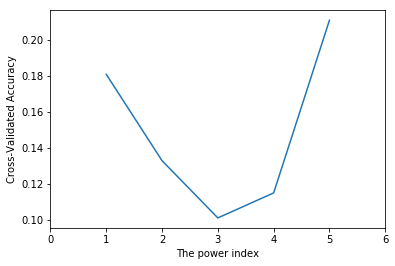

In [209]:
plt.plot(range(1,6),np_per.mean(axis=1),)
plt.xlabel("The power index")
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(new_ticks)

In [181]:
performace


[0.4793720027705468,
 0.4749473327436368,
 0.47093420814184356,
 0.47237236759981766,
 0.4786050366487763,
 0.48863345742353337,
 0.5008509535821837,
 0.5134989365644781,
 0.5254156216136275,
 0.5311693557334841,
 0.12699008031169243,
 0.1466720284475003,
 0.1731213535774343,
 0.19392859196932452,
 0.19703943414990324,
 0.0856610284446086,
 0.05018141147512508,
 0.044625017277919315,
 0.04399703745059708,
 0.04434177583525295,
 0.09970607820361901,
 0.09362788035734446,
 0.08890315970858637,
 0.08662371217992465,
 0.08541132829371521,
 0.08470807924164009,
 0.08400659611826448,
 0.08327973409084723,
 0.08270150219701378,
 0.08233674560825407,
 0.046247123023124885,
 0.047344694099561706,
 0.044616990651325183,
 0.043325084548743044,
 0.04190828578312262,
 0.0361286003446391,
 0.02515382612586888,
 0.0171810182536362,
 0.012073445963568762,
 0.008736188407018765,
 0.39638948609385205,
 0.3720148594462765,
 0.3490342508732415,
 0.3321932410259979,
 0.32280048120553895,
 0.323075349538049

In [180]:
len(performace)

200

In [164]:
cross_val_score(reg, TrainX,y= raw_data_Y['y_value_TI_3'][list(a)],scoring=score,cv=4).mean()

array([2.02965734e-01, 6.45287675e-01, 1.20716813e+00, 9.78961591e+12])

In [ ]:
reg = linear_model.LinearRegression(fit_intercept=True)
mape = cross_val_score(reg, TrainX,y= raw_data_Y['y_value_TI_3'][list(a)],scoring=score,cv=4)
mape.mean()